In [1]:
%pylab inline
import cluster_utils as cu
import itertools
import pandas as pd
import dateutil

Populating the interactive namespace from numpy and matplotlib


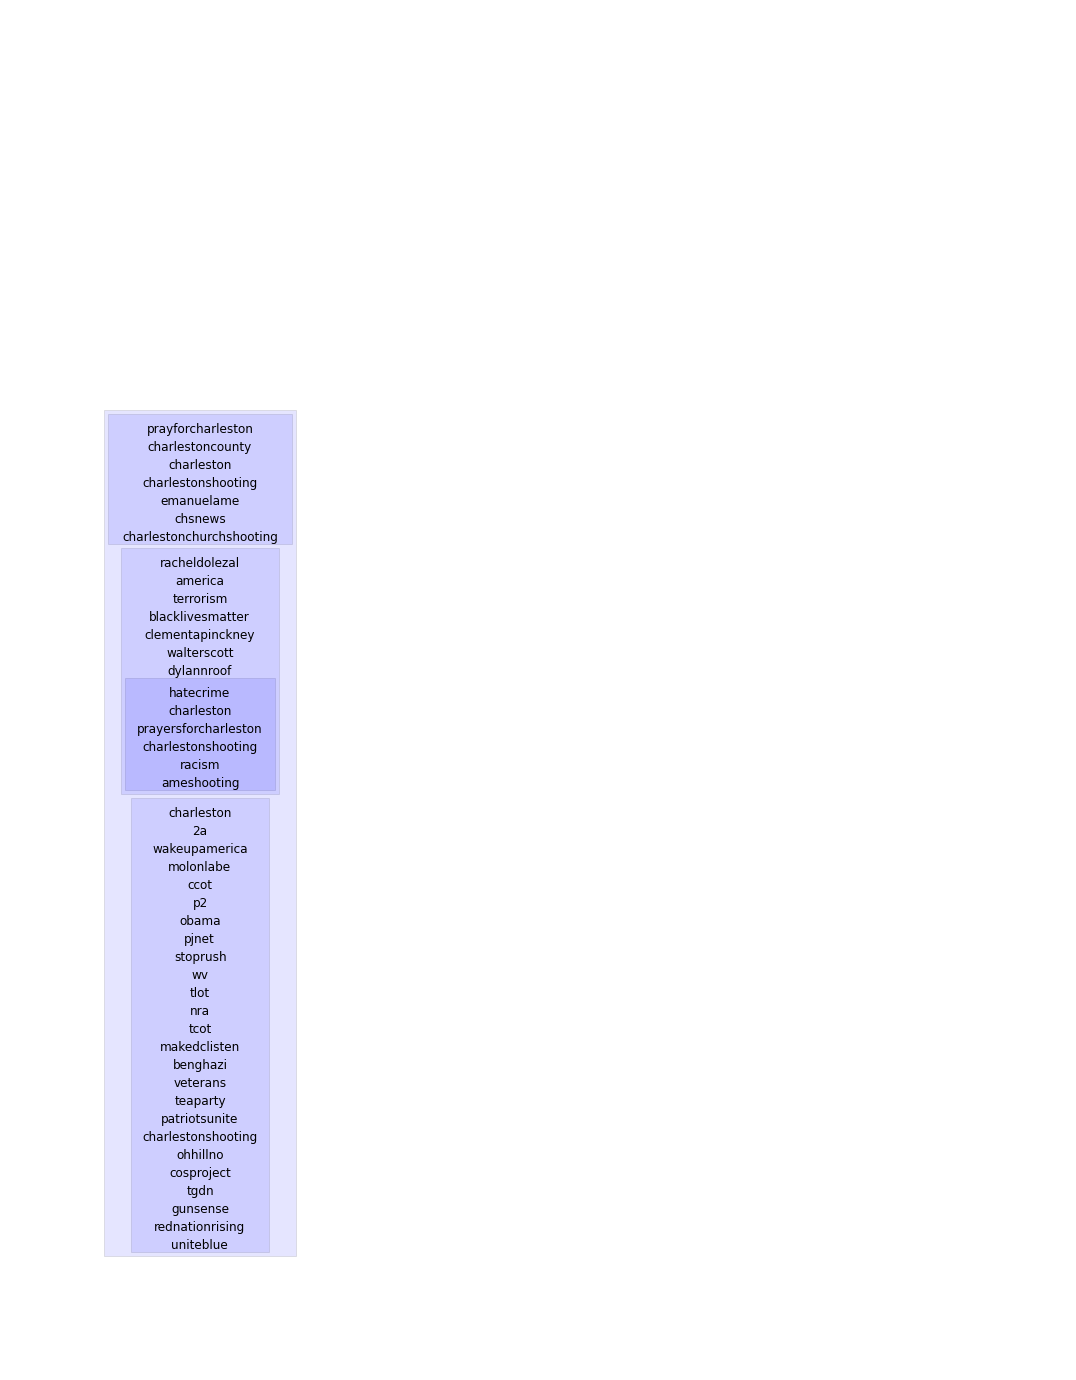

In [3]:
fig = plt.figure(figsize=(18,23))
ax = plt.gca()
ax_test = ax.twinx()

prev_elements = None
transition = None
k_min=4

current_df = cu.get_clusters_with_keyword(date='20150618', threshold=5, keyword='charleston')

center = 200
bottom = 120

current_elements = cu.make_elements(current_df, k_min=k_min)
current_elements.layout(ax_test)
current_elements.set_bottom(bottom)
current_elements.set_center(center)
current_elements.draw(ax)

ax.set_axis_off()
ax_test.set_axis_off()

In [ ]:
fig = plt.figure(figsize=(18,23))
ax = plt.gca()
ax_test = ax.twinx()

prev_elements = None
transition = None
k_min=4

current_df = cu.get_clusters_with_keyword(date='20150618', threshold=5, keyword='charleston')

for i in range(2):
    
    center = 200*i+200
    bottom = 120
    current_elements = cu.make_elements(current_df, k_min=k_min)
    current_elements.layout(ax_test)
    current_elements.set_bottom(bottom)
    current_elements.set_center(center)
    current_elements.draw(ax)

    if prev_elements != None:
        print i
        cu.draw_transition(prev_elements, current_elements, transition, ax)
        
    prev_elements = current_elements
    current_df, transition = cu.get_next_clusters(current_df, min_likelihood=.2)
    datestr = dateutil.parser.parse(current_df['date'].iloc[0]).strftime('%B %d %Y')
    ax.text(center, bottom, datestr, va='top', ha='center', transform=None, fontsize=14)

ax.set_axis_off()
ax_test.set_axis_off()